In [35]:
import pandas as pd

url = "https://raw.githubusercontent.com/Prodigy-InfoTech/data-science-datasets/main/Task%201/API_SP.POP.TOTL_DS2_en_csv_v2_38144.csv"
df = pd.read_csv(url, skiprows=4)

In [36]:
display(df.head())

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54922.0,55578.0,56320.0,57002.0,57619.0,58190.0,...,108727.0,108735.0,108908.0,109203.0,108587.0,107700.0,107310.0,107359.0,107624.0,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130075728.0,133534923.0,137171659.0,140945536.0,144904094.0,149033472.0,...,623369401.0,640058741.0,657801085.0,675950189.0,694446100.0,713090928.0,731821393.0,750503764.0,769294618.0,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,9035043.0,9214083.0,9404406.0,9604487.0,9814318.0,10036008.0,...,34700612.0,35688935.0,36743039.0,37856121.0,39068979.0,40000412.0,40578842.0,41454761.0,42647492.0,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97630925.0,99706674.0,101854756.0,104089175.0,106388440.0,108772632.0,...,429454743.0,440882906.0,452195915.0,463365429.0,474569351.0,485920997.0,497387180.0,509398589.0,521764076.0,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5231654.0,5301583.0,5354310.0,5408320.0,5464187.0,5521981.0,...,29183070.0,30234839.0,31297155.0,32375632.0,33451132.0,34532429.0,35635029.0,36749906.0,37885849.0,NaN


In [37]:
import pandas as pd

# Assume df is already loaded
important_cols = [
    "Country Name",
    "Country Code",
    "2024"
]

df_clean = df[important_cols]
df_clean.head()


,Country Name,Country Code,2024
0,Aruba,ABW,107624.0
1,Africa Eastern and Southern,AFE,769294618.0
2,Afghanistan,AFG,42647492.0
3,Africa Western and Central,AFW,521764076.0
4,Angola,AGO,37885849.0


In [38]:
df_clean = df_clean.rename(columns={
    "Country Name": "country",
    "Country Code": "code",
    "2024": "population_2024"
})

In [39]:
df_clean.isna().sum().sum()

np.int64(1)

In [40]:
df_clean.dropna(inplace=True)

In [41]:
df_clean = df_clean[
    df_clean["code"].str.len() == 3
]

In [42]:
df_clean.info()
df_clean.head()

<class 'pandas.core.frame.DataFrame'>
Index: 265 entries, 0 to 265
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          265 non-null    object 
 1   code             265 non-null    object 
 2   population_2024  265 non-null    float64
dtypes: float64(1), object(2)
memory usage: 8.3+ KB


,country,code,population_2024
0,Aruba,ABW,107624.0
1,Africa Eastern and Southern,AFE,769294618.0
2,Afghanistan,AFG,42647492.0
3,Africa Western and Central,AFW,521764076.0
4,Angola,AGO,37885849.0


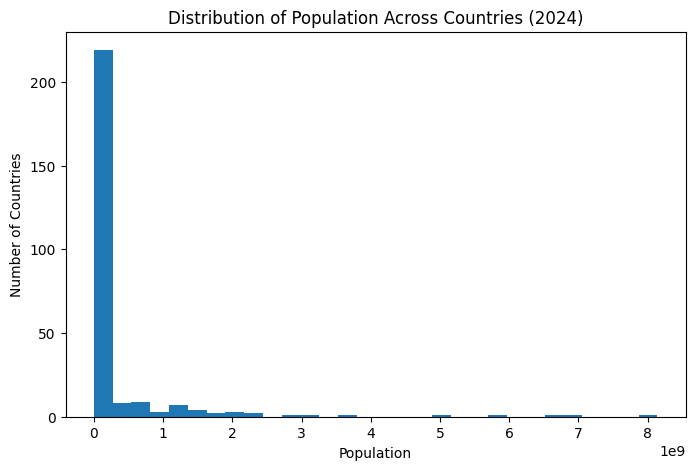

In [43]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.hist(df_clean["population_2024"], bins=30)

plt.title("Distribution of Population Across Countries (2024)")
plt.xlabel("Population")
plt.ylabel("Number of Countries")

plt.show()

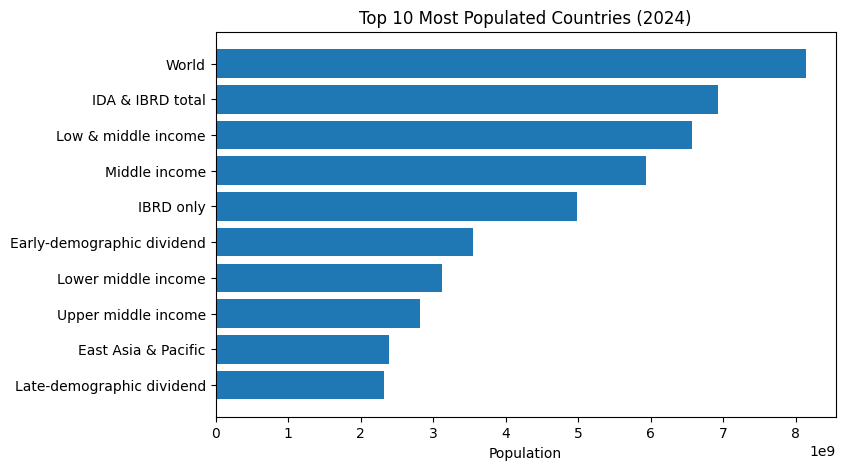

In [46]:
top10 = df_clean.sort_values(
    by="population_2024", ascending=False
).head(10)

plt.figure(figsize=(8,5))
plt.barh(top10["country"], top10["population_2024"])
plt.gca().invert_yaxis()

plt.title("Top 10 Most Populated Countries (2024)")
plt.xlabel("Population")

plt.show()
